In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("dataset.txt",header=None,names=["Population","Profit"])


In [4]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


<Axes: xlabel='Population', ylabel='Profit'>

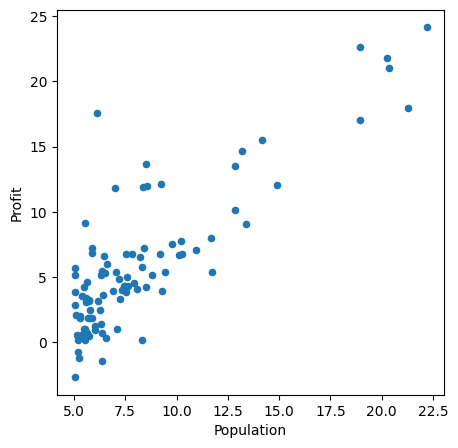

In [6]:
data.plot(kind="scatter",x="Population",y="Profit",figsize=(5,5))

In [7]:
data.insert(0,"Ones",1)

In [8]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [9]:
cols = data.shape[1]
X = data.iloc[ : , 0 : cols-1]
y = data.iloc[  : ,cols-1:cols]

In [10]:
X.head()


,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [11]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [12]:
x = np.matrix(X.values)
y = np.matrix(y)
theta = np.matrix(np.array([0, 0]))

In [13]:
x.shape

(97, 2)

In [14]:
y.shape

(97, 1)

In [15]:
theta.shape

(1, 2)

In [16]:
def compute_cost(x,y,theta):
    z = np.power(((x*theta.T)-y),2)
    return np.sum(z) /(2*len(x))

In [17]:
print("compute_cost = " , compute_cost(x,y,theta))

compute_cost =  32.072733877455676


In [18]:
def Gradient_Descent(x,y,theta,alpha,iters):
    temp = np.zeros(theta.shape)
    parameters = theta.shape[1] 
    cost = np.zeros(iters)
    for i in range(iters):
        error = np.dot(x, theta.T) - y
        for j in range(parameters) :
            term = np.multiply(error,x[:,j])
            temp[0, j] = theta[0, j] - (alpha * np.sum(term) / len(x))
        theta = temp.copy()
        cost[i] = compute_cost(x,y,theta)
    return theta,cost 

In [19]:
alpha = 0.01
iters = 10000
g,cost = Gradient_Descent(x,y,theta,alpha,iters)
print("g =" ,g)
print("cost = " , cost[:50])
print("compute cost = " , compute_cost(x,y,g))

g = [[-3.89578082  1.19303364]]
cost =  [6.73719046 5.93159357 5.90115471 5.89522859 5.89009494 5.88500416
 5.87993248 5.87487909 5.86984391 5.86482687 5.85982789 5.85484692
 5.84988389 5.84493874 5.8400114  5.83510181 5.8302099  5.82533562
 5.82047889 5.81563965 5.81081784 5.8060134  5.80122627 5.79645638
 5.79170367 5.78696808 5.78224955 5.77754801 5.77286341 5.76819568
 5.76354477 5.75891061 5.75429313 5.7496923  5.74510803 5.74054027
 5.73598897 5.73145406 5.72693549 5.72243319 5.71794711 5.71347718
 5.70902336 5.70458558 5.70016379 5.69575792 5.69136792 5.68699373
 5.6826353  5.67829257]
compute cost =  4.476971375975179


In [20]:
x = np.linspace(data.Population.min(),data.Population.max(),100)

In [21]:
f = g[0,0]+(g[0,1]*x)

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

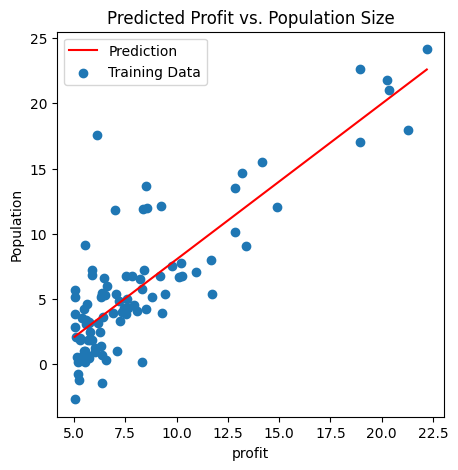

In [22]:
fig , ax = plt.subplots(figsize=(5,5))
ax.plot(x,f,'r',label ="Prediction")
ax.scatter(data.Population,data.Profit,label = "Training Data")
ax.legend()
ax.set_ylabel("Population")
ax.set_xlabel("profit")
ax.set_title("Predicted Profit vs. Population Size")

Text(0.5, 1.0, 'Error vs. Training Data')

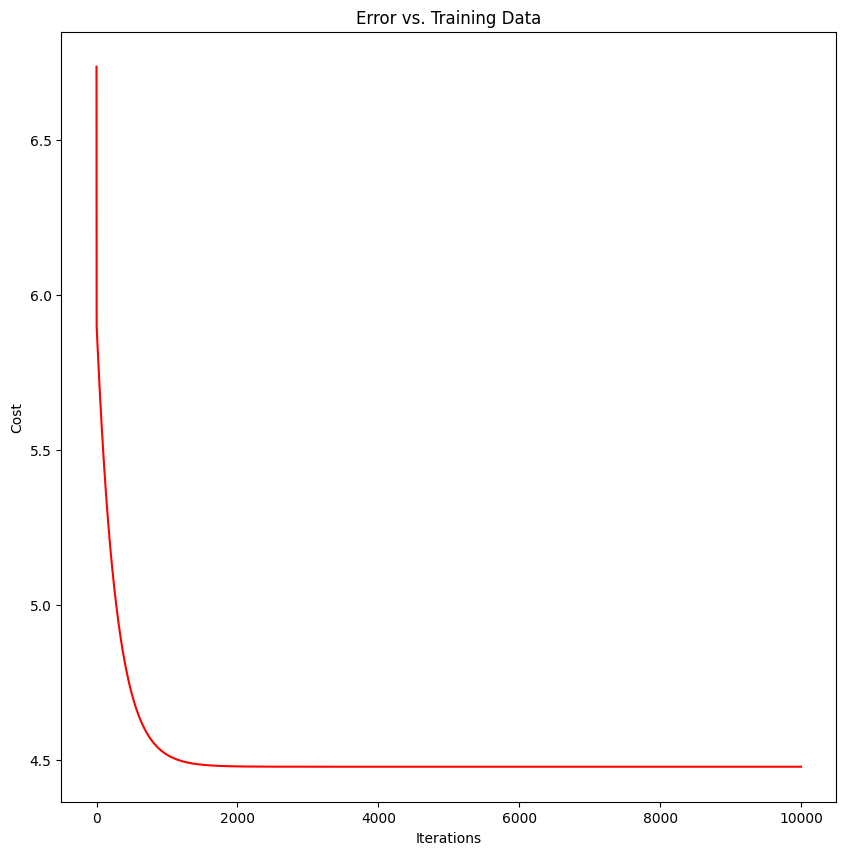

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.set_title("Error vs. Training Data")
